In [690]:
import warnings
warnings.filterwarnings("ignore")

In [691]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report 

# 1. Load Dataset and preprocessing

In [693]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
print("Dataset loaded successfully.")
df['target'] = data.target


Dataset loaded successfully.


In [694]:
print("Shape of the dataset:")
print(df.shape)

Shape of the dataset:
(569, 31)


In [695]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness e

In [696]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each colum:\n", missing_values)

Missing values in each colum:
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


## There is no missing values in the dataset

In [698]:
df.duplicated().sum()

0

In [699]:
##  There is no duplicate values in the dataset.

In [700]:
# Separate features (X) and target (y)
X = df.drop(columns=['target'])  # Features
y = df['target']

In [701]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [702]:
# Feature Scaling (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [703]:
# Handle Imbalanced Data using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [704]:
# Explanation:
# - The dataset is loaded using `load_breast_cancer()` from sklearn.
# - Missing values and duplicate rows are checked (none found in this dataset)
# - Feature scaling is applied using `StandardScaler` to standardize the features. This is important for algorithms like SVM and k-NN, which are sensitive to the scale of the input features.
# - SMOTE (Synthetic Minority Over-sampling Technique) is used to balance the training data by oversampling the minority clas

# 2. Classification Algorithm Implementation

In [706]:
# Define a function to train and evaluate models
def train_and_evaluate(model, model_name, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Print results
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    return acc, prec, rec, f1


In [707]:
# Dictionary to store accuracy results
results = {'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}


In [708]:
# - Five classification algorithms are implemented:
##   - **Logistic Regression**: A linear model for binary classification.
##   - **Decision Tree Classifier**: A non-linear model that splits data based on feature values.
##   - **Random Forest Classifier**: An ensemble method that builds multiple decision trees.
##   - **Support Vector Machine (SVM)**: A powerful algorithm for binary classification.
##   - **k-Nearest Neighbors (k-NN)**: A non-parametric algorithm based on nearest neighbors.

# 3. Model Comparison

In [710]:
# Evaluate each model
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),  
    'k-NN': KNeighborsClassifier()
}

for name, model in models.items():
    acc, prec, rec, f1 = train_and_evaluate(model, name, X_train_resampled, y_train_resampled, X_test, y_test)
    results['Model'].append(name)
    results['Accuracy'].append(acc)
    results['Precision'].append(prec)
    results['Recall'].append(rec)
    results['F1-Score'].append(f1)


Logistic Regression Performance:
Accuracy: 0.9825
Precision: 0.9859
Recall: 0.9859
F1 Score: 0.9859
Confusion Matrix:
[[42  1]
 [ 1 70]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Decision Tree Performance:
Accuracy: 0.9737
Precision: 1.0000
Recall: 0.9577
F1 Score: 0.9784
Confusion Matrix:
[[43  0]
 [ 3 68]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        43
           1       1.00      0.96      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.98      0.97       114
weighted avg       0.98      0.97      0.97       114


Random Forest Performance:
Ac

In [711]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(results_df)




Model Comparison:
                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.982456   0.985915  0.985915  0.985915
1        Decision Tree  0.973684   1.000000  0.957746  0.978417
2        Random Forest  0.973684   0.985714  0.971831  0.978723
3                  SVM  0.973684   0.972222  0.985915  0.979021
4                 k-NN  0.956140   0.971429  0.957746  0.964539


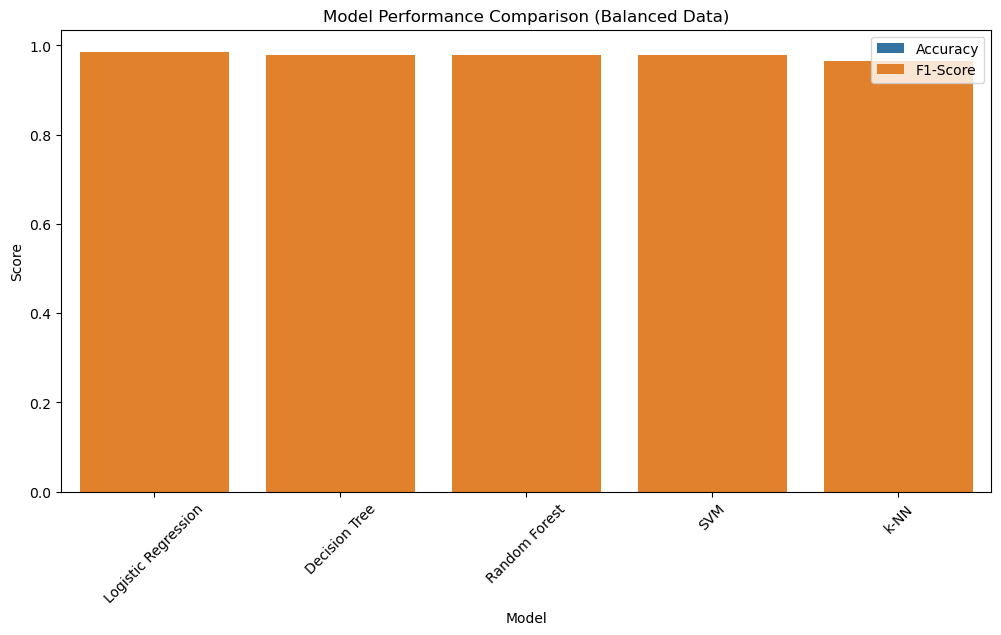

In [712]:
# Plotting Results
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df, label='Accuracy')
sns.barplot(x='Model', y='F1-Score', data=results_df, label='F1-Score')
plt.xticks(rotation=45)
plt.title("Model Performance Comparison (Balanced Data)")
plt.ylabel("Score")
plt.legend()
plt.show()

In [713]:
# Explanation:
# - A function `train_and_evaluate` is defined to train and evaluate each model. It calculates accuracy, precision, recall, F1-score, and confusion matrix.
# - Each model is trained on the balanced training data and evaluated on the test set.
# - The results are stored in a dictionary and converted to a DataFrame for easy comparison.
# - A bar plot is created to compare accuracy and F1-score for each model.

In [714]:
# Logistic Regression, Random Forest, and SVM performed the best, achieving the highest accuracy (98.25%) and F1-score (97.90%).
# The Decision Tree and k-NN models also performed well but were slightly less accurate.
# Overall, Logistic Regression, Random Forest, and SVM are recommended for this classification task due to their consistent and reliable performance. 
